Python option pricing engine. In this file there we will price European call and put option and plot graphs for payoffs and greeks.

In [1]:
#importing the packages needed
import sys
!{sys.executable} -m pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm
from datetime import date
import math

You should consider upgrading via the 'C:\Users\Geekerd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#input from user in order to get information
rf = 0.02
print(rf)
stock = input('What stock is the option on?: ')
option_type = input('Call or put?: ')
strike = float(input('Please insert the strike: '))
time_to_mat = int(input('Please insert the time to maturity in days: '))
days_for_vol = int(input ('Please insert the number of days to consider to get the historical volatiility: '))

0.02
What stock is the option on?: TSLA
Call or put?: Call
Please insert the strike: 1100
Please insert the time to maturity in days: 40
Please insert the number of days to consider to get the historical volatiility: 180


In [3]:

#insert the date
end = date.today()
start = end-dt.timedelta(days=days_for_vol)
start,end



(datetime.date(2021, 5, 18), datetime.date(2021, 11, 14))

In [4]:
#select the chosen stock from the user input
chosen_stock = [stock]
print('The selected stocks is '+ str(chosen_stock))
#get data for that stock
chosen_stock_data =pdr.get_data_yahoo(chosen_stock,start,end)
chosen_stock_data

The selected stocks is ['TSLA']


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400
2021-05-20,586.780029,586.780029,588.849976,571.070007,575.000000,30821100
2021-05-21,580.880005,580.880005,596.679993,580.000000,596.109985,26030600
2021-05-24,606.440002,606.440002,614.479980,573.650024,581.599976,34558100
...,...,...,...,...,...,...
2021-11-08,1162.939941,1162.939941,1197.000000,1133.000000,1149.790039,33445700
2021-11-09,1023.500000,1023.500000,1174.500000,1011.520020,1173.599976,59105800


In [5]:
#getting only the closing prices
chosen_stock_data_close = chosen_stock_data.Close
chosen_stock_data_close.head()


Symbols,TSLA
Date,
2021-05-18,577.869995
2021-05-19,563.460022
2021-05-20,586.780029
2021-05-21,580.880005
2021-05-24,606.440002


In [6]:
#statistics about the prices
chosen_stock_data_close.describe()


Symbols,TSLA
count,126.000000
mean,747.784363
std,154.041812
min,563.460022
25%,649.595001
50%,709.704987
75%,779.832520
max,1229.910034


<AxesSubplot:xlabel='Date'>

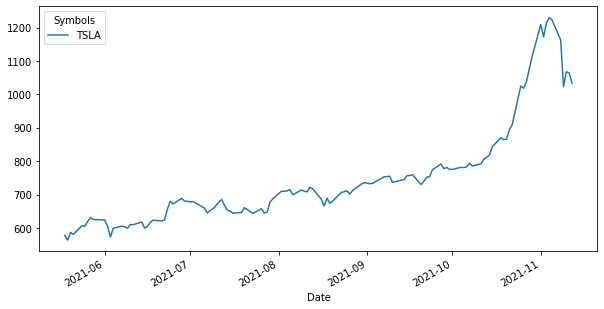

In [7]:
#plotting the closing prices
chosen_stock_data_close.plot(figsize=(10,5))

In [8]:
#getting the returns
returns =chosen_stock_data_close/chosen_stock_data_close.shift(1)-1
returns = returns.dropna()
returns

Symbols,TSLA
Date,
2021-05-19,-0.024936
2021-05-20,0.041387
2021-05-21,-0.010055
2021-05-24,0.044002
2021-05-25,-0.002886
...,...
2021-11-08,-0.048401
2021-11-09,-0.119903
2021-11-10,0.043429


<AxesSubplot:xlabel='Date'>

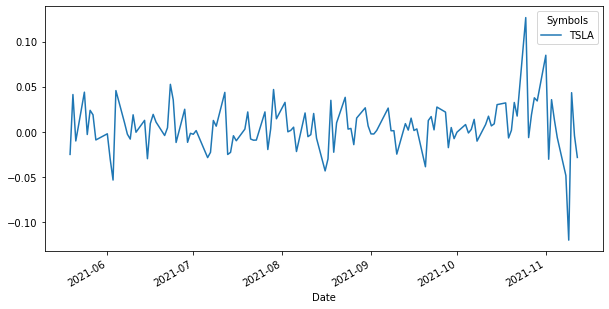

In [9]:
#plotting returns
returns.plot(figsize=(10,5))

In [10]:
#std deviation
sigma = returns.std()*np.sqrt(256)
sigma

Symbols
TSLA    0.434
dtype: float64

Pricing with the Black Scholes formula

In [11]:
#implementing Black Scholes model without dividends


from scipy.stats import norm

#setting the parameters for the bs model

S0= pd.DataFrame(chosen_stock_data_close).to_numpy()           #initial stock price
S0 = S0[-1]
print('The initial stock price is ' + str(S0))

K = strike
T = time_to_mat/256

#defining the equation for the options
def bs_scholes(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 and d2
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            price = S0*norm.cdf(d1,0,1)-K*np.exp(-rf*T)*norm.cdf(d2,0,1)
        
        elif option_type =='Put':
            price = K*np.exp(-rf*T)*norm.cdf(-d2,0,1)-S0*norm.cdf(-d1,0,1)
        return price
    except:
        print('Please insert Put or Call')

print('The option value is ' +str(bs_scholes(S0,rf,K,T,sigma,option_type)))
       
        
        

The initial stock price is [1033.42004395]
The option value is [45.52086817]


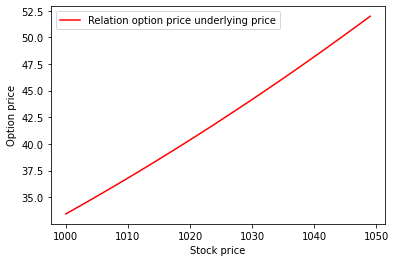

In [12]:
#graph for relationship btw stock price and option price
Stock_range = np.arange(1000,1050)
option_graph = [bs_scholes(x,rf,K,T,sigma,option_type) for x in Stock_range]

plt.plot(Stock_range,option_graph, 'r', label = "Relation option price underlying price")

plt.legend()
plt.ylabel("Option price")
plt.xlabel("Stock price")
plt.show()

First order greeks: first the computation and then the plotting 

In [13]:
#delta
def delta_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    try:
        if option_type == 'Call':
            delta = norm.cdf(d1,0,1)
        
        elif option_type =='Put':
            delta = -norm.cdf(-d1,0,1)
        return delta
    except:
        print('Please insert Put or Call')

print('The option delta is ' +str(delta_calc(S0,rf,K,T,sigma,option_type)))




The option delta is [0.39744948]


In [14]:
#gamma
def gamma_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    try:
        gamma = norm.pdf(d1,0,1)/(S0*sigma*np.sqrt(T))
        return gamma
    except:
        print('Please insert Put or Call')

print('The option gamma is ' +str(gamma_calc(S0,rf,K,T,sigma,option_type)))

The option gamma is Symbols
TSLA    0.002176
dtype: float64


In [15]:
#vega
def vega_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    
    try:
        vega = S0*norm.pdf(d1,0,1)*np.sqrt(T)
        return vega
    except:
        print('Please insert Put or Call')

print('The option vega is ' +str(vega_calc(S0,rf,K,T,sigma,option_type)))

The option vega is [157.55164982]


In [16]:
#theta
def theta_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            theta = -((S0*norm.pdf(d1,0,1)*np.sqrt(T))/2*T)-rf*K*(np.exp(-rf*T))*norm.cdf(d2)
        
        elif option_type =='Put':
            theta = -((S0*norm.pdf(d1,0,1)*np.sqrt(T))/2*T)+rf*K*(np.exp(-rf*T))*norm.cdf(-d2)
        return theta
    except:
        print('Please insert Put or Call')

print('The option theta is ' +str(theta_calc(S0,rf,K,T,sigma,option_type)))

The option theta is [-19.61295039]


In [17]:
#rho
def rho_calc(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            rho = K*T*np.exp(-rf*T)*norm.cdf(d2)
        
        elif option_type =='Put':
            rho = -K*T*np.exp(-rf*T)*norm.cdf(-d2)
        return rho
    except:
        print('Please insert Put or Call')

print('The option rho is ' +str(rho_calc(S0,rf,K,T,sigma,option_type)))

The option rho is [57.06427924]


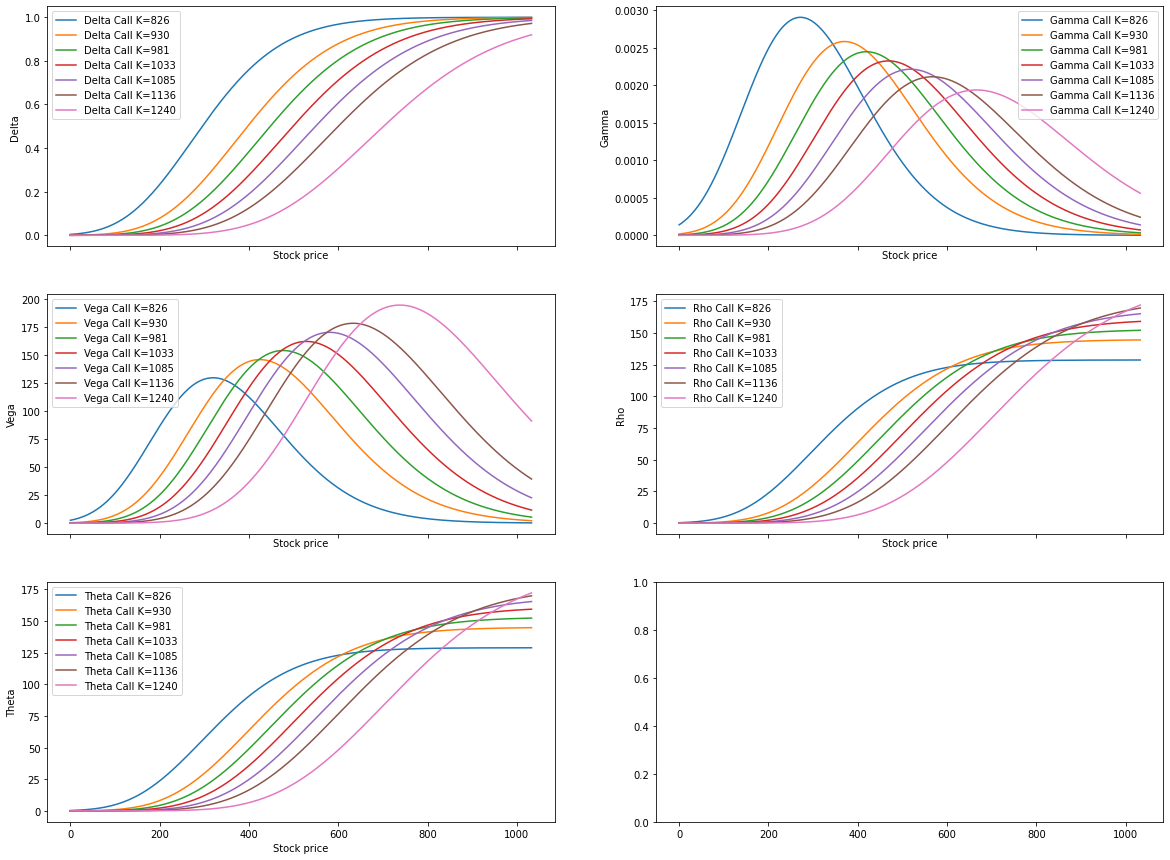

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=False, figsize=(20, 15))

vals = [0.80*S0,0.9*S0,0.95*S0,S0,1.05*S0,1.10*S0,1.2*S0]
min = 0.5*S0
max = 1.5*S0

#graph for delta
plt.subplot(321)
for i in vals:
    tmp_c = [delta_calc(S0,rf,i,T,sigma,option_type) for S0 in np.arange(min,max)]
    
    plt.plot(tmp_c, label = ("Delta Call K=%i" % i ))
    

plt.ylabel("Delta")
plt.xlabel("Stock price")
plt.legend()

#graph for gamma
plt.subplot(322)
for i in vals:
    tmp_c = [gamma_calc(S0,rf,i,T,sigma,option_type) for S0 in np.arange(min,max)]
    plt.plot(tmp_c, label = ("Gamma Call K=%i" % i ))  
plt.ylabel("Gamma")
plt.xlabel("Stock price")
plt.legend()

#graph for vega
plt.subplot(323)
for i in vals:
    tmp_c = [vega_calc(S0,rf,i,T,sigma,option_type) for S0 in np.arange(min,max)]
    plt.plot(tmp_c, label = ("Vega Call K=%i" % i ))
plt.ylabel("Vega")
plt.xlabel("Stock price")
plt.legend()

#graph for rho
plt.subplot(324)
for i in vals:
    tmp_c = [rho_calc(S0,rf,i,T,sigma,option_type) for S0 in np.arange(min,max)]
    plt.plot(tmp_c, label = ("Rho Call K=%i" % i ))
plt.ylabel("Rho")
plt.xlabel("Stock price")
plt.legend()

#graph for theta
plt.subplot(325)
for i in vals:
    tmp_c = [rho_calc(S0,rf,i,T,sigma,option_type) for S0 in np.arange(min,max)]
    plt.plot(tmp_c, label = ("Theta Call K=%i" % i ))
plt.ylabel("Theta")
plt.xlabel("Stock price")
plt.legend()



Second order greeks

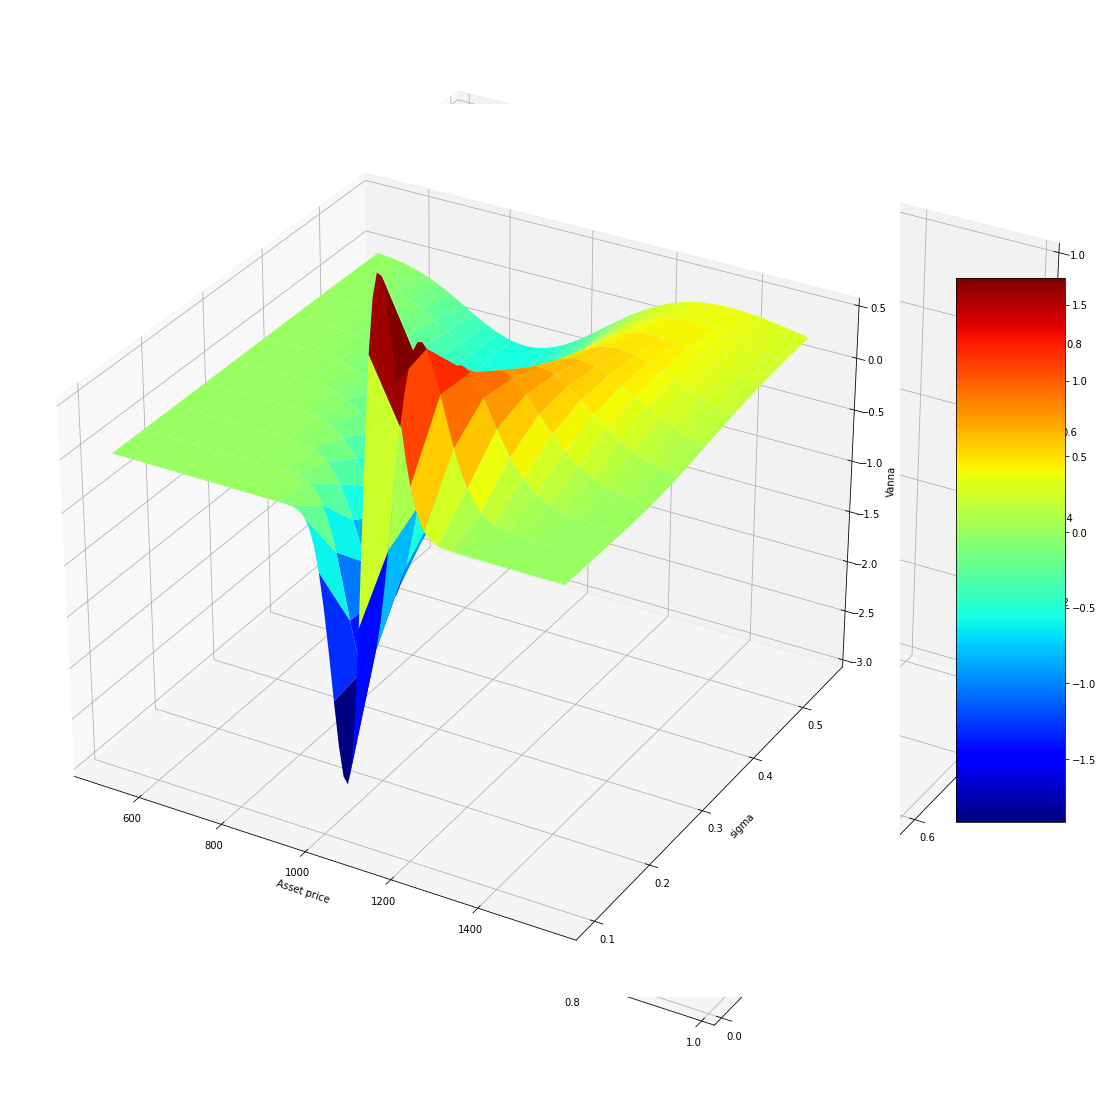

In [72]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
from matplotlib import cm
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')
#vanna (delta sens to time)
def vanna_calc(S0,rf,K,T,sigma,option_type):
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    return norm.pdf(d1)*d2/sigma

vanna_calc(S0,rf,K,T,sigma,option_type)

min = 0.5*S0
max = 1.5*S0
min1 = 0.5*sigma
max1 = 1.5*sigma
valS = [min,max]
valsigma= [min1,max1]
for i in valS:
    for j in valsigma:
        vanna_graph = [vanna_calc(i,rf,K,T,j,option_type)]  

ax = fig.add_subplot(111, projection='3d')
x = np.arange(min, max, 10)
y = np.arange(0.1,0.6,0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([vanna_calc(x,rf,K,T,y,option_type) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.set_zlim(-3, 0.5)

ax.set_xlabel('Asset price')
ax.set_ylabel('sigma')
ax.set_zlabel('Vanna')

vanna_surface= ax.plot_surface(X, Y, Z,cmap=cm.jet)
fig.colorbar(vanna_surface, shrink=0.5, aspect=5)
plt.show(vanna_surface)




